In [63]:
import netCDF4 as nc
import timeit
import matplotlib.pyplot as plt
import os 
import re
import json
import xarray as xr
import kerchunk
import kerchunk.hdf
from kerchunk.hdf import SingleHdf5ToZarr
from kerchunk.combine import MultiZarrToZarr

In [2]:
path_to_mswep = '/work/bb1153/b382075/datasets/MSWEP_V280/Past/Daily/'
filename_cdf = ['1987121.nc', '1987122.nc', #'1987123.nc ', 
                '1987124.nc', '1987125.nc', '1987126.nc', #'1987127.nc ',
                '1987128.nc', '1987129.nc', '1987130.nc', '1987131.nc', '1987132.nc', '1987133.nc', 
                '1987134.nc', '1987135.nc', '1987136.nc', '1987137.nc', '1987138.nc', '1987139.nc', 
                '1987140.nc', '1987141.nc', '1987142.nc', ]


new_path = '/work/bb1153/b382267/AQUA/test_zarr/'
filename_zarr = '1987121.zarr'

In [7]:
file = str(new_path )+str(filename_cdf[0])
nc.Dataset(file)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    history: Created on 2021-02-04 02:51
    dimensions(sizes): lon(3600), lat(1800), time(1)
    variables(dimensions): float32 lon(lon), float32 lat(lat), int32 time(time), float32 precipitation(time, lat, lon)
    groups: 

In [108]:
name = '1987121.nc'
#re.split('a', name)
if 'nc' in name:
    print(True)
elif 'zarr' in name:
    print(False)

True


In [85]:
file

out  = SingleHdf5ToZarr(h5f=file,inline_threshold=200) 
out = out.translate()
print(type(out))

with open(str(new_path)+"test_1.json", "w") as outfile:
    json.dump(out, outfile)

#type(SingleHdf5ToZarr(h5f=file,inline_threshold=20))

<class 'kerchunk.hdf.SingleHdf5ToZarr'>


TypeError: Object of type SingleHdf5ToZarr is not JSON serializable

In [106]:
#ds = xr.open_dataset(
#    str(new_path)+"test.json", engine="zarr")

_file_zarr=str(new_path)+"test.json"
_file_zarr
ds = xr.open_zarr("/work/bb1153/b382267/AQUA/test_zarr/test.json", consolidated=False)
#ds = xr.open_zarr(f"reference::{_file_zarr}" ) #, consolidated=False
ds

FSPathExistNotDir: path exists but is not a directory: %r

In [112]:
convert2zarr()

{'version': 1,
 'refs': {'.zgroup': '{"zarr_format":2}',
  '.zattrs': '{"history":"Created on 2021-02-04 02:51"}',
  'lat/.zarray': '{"chunks":[1800],"compressor":null,"dtype":"<f4","fill_value":null,"filters":null,"order":"C","shape":[1800],"zarr_format":2}',
  'lat/.zattrs': '{"_ARRAY_DIMENSIONS":["lat"],"long_name":"latitude","units":"degrees_north"}',
  'lat/0': ['/work/bb1153/b382267/AQUA/test_zarr/1987121.nc', 16326, 7200],
  'lon/.zarray': '{"chunks":[3600],"compressor":null,"dtype":"<f4","fill_value":null,"filters":null,"order":"C","shape":[3600],"zarr_format":2}',
  'lon/.zattrs': '{"_ARRAY_DIMENSIONS":["lon"],"long_name":"longitude","units":"degrees_east"}',
  'lon/0': ['/work/bb1153/b382267/AQUA/test_zarr/1987121.nc', 1614, 14400],
  'precipitation/.zarray': '{"chunks":[1,32,32],"compressor":{"id":"zlib","level":4},"dtype":"<f4","fill_value":-9999.0,"filters":[{"elementsize":4,"id":"shuffle"}],"order":"C","shape":[1,1800,3600],"zarr_format":2}',
  'precipitation/.zattrs': '{

In [111]:
def convert2zarr(file = file, inline_threshold=200, save = True, path = new_path):
    zarray = SingleHdf5ToZarr(h5f=file, inline_threshold=inline_threshold) 
    out = zarray.translate()
    if save:
        namewithextension = re.split('/', file)[-1]
        name = re.split(r'\.', namewithextension)[0]
        with open(str(new_path+str(name))+".json", "w") as outfile:
            json.dump(out, outfile)
    return  zarray.translate()
    

def opends(file = file, engine="netcdf4"):
    #if engine=="netcdf4":
    namewithextension = re.split('/', file)[-1]
    if 'nc' in namewithextension :
        ds = xr.open_dataset(
        file, engine="netcdf4"
        )
    #elif engine=="zarr":
    elif 'json' in namewithextension:
        ds = xr.open_zarr(f"reference::{file}" , consolidated=False)
        #ds = xr.open_dataset(
        #    "reference://", engine="zarr",
        #    backend_kwargs={
        #        "storage_options": {
        #            "fo": out,
        #        },
        #        "consolidated": False
        #    }
        #)
    return ds

In [43]:
ds = xr.open_dataset(
    file, engine="netcdf4"
)

In [44]:
ds

<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800, time: 1)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time           (time) datetime64[ns] 1987-05-01
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes:
    history:  Created on 2021-02-04 02:51

In [25]:
temp = nc.Dataset(file, 'r')
lon = temp.variables['lon'][:]

-178.95

In [26]:
files = [str(path_to_mswep)+str(filename_cdf[i]) for i in range(0, len(filename_cdf))]

In [27]:
def exctract_mem_size_and_unit(str):
      if 'K' in str:
            mem_unit = 'K'
      elif 'M' in str:
            mem_unit = 'M'
      elif 'G' in str:
            mem_unit = 'G'   
      elif 'T' in str:
            mem_unit = 'T'
      elif 'P' in str:
            mem_unit = 'P'  
      elif 'E' in str:
            mem_unit = 'E'      
      elif 'Z' in str:
            mem_unit = 'Z'     
      elif 'Y' in str:
            mem_unit = 'Y'             
      
      mem_size = float(re.findall("\d+\.\d+", str)[0])
      return  mem_size, mem_unit


def mem_of_file(filename = file):
    with os.popen("du -sh " + str(file)) as f:
            _ = f.readline()
            memory_of_file = re.split('\t', _)[0]
            mem_size, mem_unit = exctract_mem_size_and_unit(memory_of_file)
            return  mem_size, mem_unit
    
def mem_unit_converter(old_unit='M', new_unit='G'):
        if old_unit=='K':
                if new_unit=="M":
                        return (1/1024)
                elif new_unit =="G":
                      return (1/1024)**2
                elif new_unit =="T":
                      return (1/1024)**3
                elif new_unit =="P":
                      return (1/1024)**4
                elif new_unit =="E":
                      return (1/1024)**5
                elif new_unit =="K":
                      return 1
        elif old_unit=='M':
              if new_unit=="K":
                    return (1024)
              elif new_unit =="G":
                    return (1/1024)
              elif new_unit =="T":
                    return (1/1024)**2
              elif new_unit =="P":
                    return (1/1024)**3
              elif new_unit =="E":
                    return (1/1024)**4
              elif new_unit=="M":
                    return 1
        elif old_unit=='G': 
              if new_unit=="K": 
                    return (1024)*2 
              elif new_unit=="M":
                    return (1024) 
              elif  new_unit=="T":
                    return (1/1024)
              elif new_unit=="P":
                    return (1/1024)**2
              elif new_unit =="E":
                    return (1/1024)**3
              elif new_unit == 'G':
                    return 1
        else:
                raise Exception("unknown type")

def exctract_sinfo(sinfo_str=' '):
    """_summary_

    Args:
        sinfo_str (str, optional): _description_. Defaults to ' '.

    Returns:
        _type_: _description_
    """    
    with os.popen(sinfo_str) as f:
            f.readline()
            f.readline()
            _ = f.readline()
    list_with_empty_strings= re.split(r'[\n ]', _)
    new_list = [x for x in list_with_empty_strings if x != '']
    return new_list
        
def max_resources_per_node(queue="compute"):
    """_summary_

    Args:
        queue (str, optional): _description_. Defaults to "compute".

    Raises:
        Exception: _description_
        Exception: _description_

    Returns:
        _type_: _description_
    """    
    max_resources = exctract_sinfo("sinfo  --partition="+str(queue)+" -lNe")
    if max_resources[2]==queue:   
        max_cpus = max_resources[4]
        max_memory  = str (float(max_resources[6])/1024)+" GB"
        max_sockets, max_cores, max_threads = re.split(r'[:]', max_resources[5])
    else:
        raise Exception("The function can not extract information about the queue correctly. \n \
                        Please, select the amount of memory, cores, threads, and walltime manually.")

    if queue == exctract_sinfo("sinfo  --partition="+str(queue)+" -le")[0]:
        max_walltime = exctract_sinfo("sinfo  --partition="+str(queue)+" -le")[2]
    else:
        raise Exception("The function can not extract information about the queue correctly. \n \
                        Please, select the amount of memory, cores, threads, and walltime manually.")
    
    return  max_memory, max_walltime, max_cpus, max_sockets, max_cores, max_threads 


max_memory, max_walltime, max_cpus, max_sockets, max_cores, max_threads  = max_resources_per_node("compute")
max_memory_compute = max_memory


max_memory, max_walltime, max_cpus, max_sockets, max_cores, max_threads  = max_resources_per_node("interactive")
max_memory_interactive = max_memory




In [28]:
test_number_of_files = len(files)
with os.popen("ls " + str(path_to_mswep)+ " | wc -l") as f:
        total_number_of_files = int(f.readline())

In [29]:
%timeit -r 1 -n 1 -o [nc.Dataset(file,  'r')]

82 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 82 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [30]:
result = %timeit -r 1 -n 1 -o [nc.Dataset(files[i],  'r') for i in range(0, len(files))]
time_av, time_stdev =  result.average, result.stdev 

1.66 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Text(0.5, 1.0, 'Time to read the metadata')

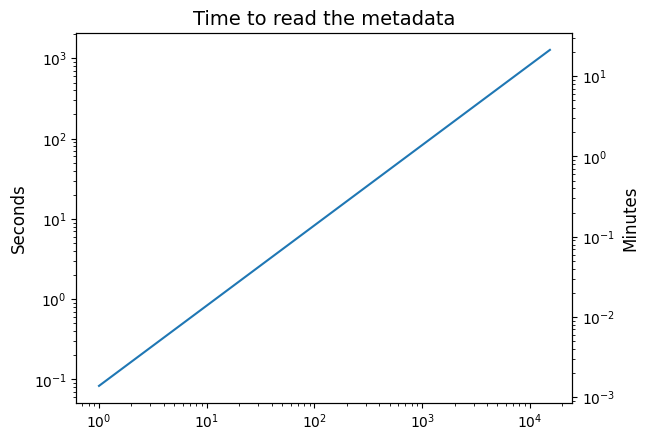

In [31]:
fig, ax =  plt.subplots( ) 
ax.plot([1, test_number_of_files, total_number_of_files],
        [time_av/test_number_of_files, time_av, total_number_of_files*time_av/test_number_of_files], 
        label= 'mean', color = 'tab:blue')
#seconds2hours = 1/(60*60)
sec2min = 1/(60)
ax2=ax.twinx()
ax2.plot([1, test_number_of_files, total_number_of_files],
         [time_av*sec2min /test_number_of_files, time_av*sec2min, total_number_of_files*time_av*sec2min /test_number_of_files], 
         ls=' ')
ax.set_yscale('log')
ax2.set_yscale('log')
ax.set_xscale('log')
ax2.set_xscale('log')
ax.set_ylabel('Seconds', fontsize=12)
ax2.set_ylabel('Minutes', fontsize=12)
ax.set_title('Time to read the metadata', fontsize=14)

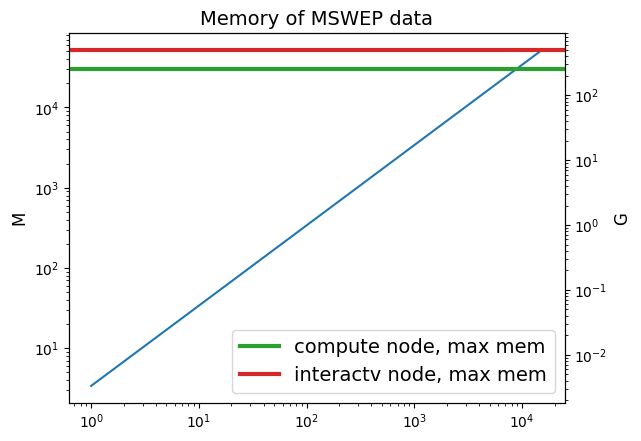

In [60]:
mem_size_of_file, mem_unit_of_file = mem_of_file()
mem_converter = mem_unit_converter(old_unit=mem_unit_of_file, new_unit='G')
max_number_of_files =  total_number_of_files

fig, ax =  plt.subplots( ) 
ax.plot([1, max_number_of_files],
        [mem_size_of_file, max_number_of_files*mem_size_of_file], 
        label= '_Hidden', color = 'tab:blue')
ax2=ax.twinx()

ax2.plot([1, max_number_of_files],
        [mem_size_of_file*mem_converter, max_number_of_files*mem_size_of_file*mem_converter],
         ls=' ')
ax.set_yscale('log')
ax2.set_yscale('log')
ax.set_xscale('log')
ax2.set_xscale('log')
ax.set_ylabel(mem_unit_of_file, fontsize=12)
ax2.set_ylabel('G', fontsize=12)

# compute 
mem_size, mem_unit = exctract_mem_size_and_unit(max_memory_compute)
mem_converter = mem_unit_converter(old_unit=mem_unit, new_unit='G')
ax2.axhline(mem_converter*mem_size, color = 'tab:green', lw = '3', label = 'compute node, max mem')
#
# interactive 
mem_size, mem_unit = exctract_mem_size_and_unit(max_memory_interactive)
mem_converter = mem_unit_converter(old_unit=mem_unit, new_unit='G')
ax2.axhline(mem_converter*mem_size, color = 'tab:red', lw = 3,  label = 'interactv node, max mem')

ax.set_title('Memory of MSWEP data', fontsize=14)
ax2.legend(fontsize = 14)

## Zarr files

In [ ]:
def gen_zarr(f):
    with fsspec.open(f, mode="rb", anon=True) as infile:
        return SingleHdf5ToZarr(infile, f, inline_threshold=300).translate()

In [53]:
zarray = SingleHdf5ToZarr(h5f=file,inline_threshold=200) #, storage_options=new_path)
out = zarray.translate()

ds = xr.open_dataset(
    "reference://", engine="zarr",
    backend_kwargs={
        "storage_options": {
            "fo": out,
        },
        "consolidated": False
    }
)

In [49]:

ds = xr.open_dataset(
    "reference://", engine="zarr",
    backend_kwargs={
        "storage_options": {
            "fo": out,
        },
        "consolidated": False
    }
)

In [47]:
ds

<xarray.Dataset>
Dimensions:        (lat: 1800, lon: 3600, time: 1)
Coordinates:
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * time           (time) datetime64[ns] 1987-05-01
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes:
    history:  Created on 2021-02-04 02:51

In [5]:
help(SingleHdf5ToZarr)

Help on class SingleHdf5ToZarr in module kerchunk.hdf:

class SingleHdf5ToZarr(builtins.object)
 |  SingleHdf5ToZarr(h5f: 'BinaryIO | str', url: str = None, spec=1, inline_threshold=500, storage_options=None, error='warn', vlen_encode='embed')
 |  
 |  Translate the content of one HDF5 file into Zarr metadata.
 |  
 |  HDF5 groups become Zarr groups. HDF5 datasets become Zarr arrays. Zarr array
 |  chunks remain in the HDF5 file.
 |  
 |  Parameters
 |  ----------
 |  h5f : file-like or str
 |      Input HDF5 file. Can be a binary Python file-like object (duck-typed, adhering
 |      to BinaryIO is optional), in which case must also provide url. If a str,
 |      file will be opened using fsspec and storage_options.
 |  url : string
 |      URI of the HDF5 file, if passing a file-like object
 |  spec : int
 |      The version of output to produce (see README of this repo)
 |  inline_threshold : int
 |      Include chunks smaller than this value directly in the output. Zero or negative
